In [1]:
from textblob import TextBlob

In [2]:
text = """I have yet to understand how repetition helps one in understanding Python.
It is a miracle indeed how easy or difficult Python is based on one\'s efforts"""

In [3]:
blob = TextBlob(text)

In [4]:
blob

TextBlob("I have yet to understand how repetition helps one in understanding Python.
It is a miracle indeed how easy or difficult Python is based on one's efforts")

In [5]:
blob.sentences

[Sentence("I have yet to understand how repetition helps one in understanding Python."),
 Sentence("It is a miracle indeed how easy or difficult Python is based on one's efforts")]

In [6]:
blob.words

WordList(['I', 'have', 'yet', 'to', 'understand', 'how', 'repetition', 'helps', 'one', 'in', 'understanding', 'Python', 'It', 'is', 'a', 'miracle', 'indeed', 'how', 'easy', 'or', 'difficult', 'Python', 'is', 'based', 'on', 'one', "'s", 'efforts'])

In [7]:
blob.tags

[('I', 'PRP'),
 ('have', 'VBP'),
 ('yet', 'RB'),
 ('to', 'TO'),
 ('understand', 'VB'),
 ('how', 'WRB'),
 ('repetition', 'NN'),
 ('helps', 'VBZ'),
 ('one', 'CD'),
 ('in', 'IN'),
 ('understanding', 'VBG'),
 ('Python', 'NNP'),
 ('It', 'PRP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('miracle', 'NN'),
 ('indeed', 'RB'),
 ('how', 'WRB'),
 ('easy', 'JJ'),
 ('or', 'CC'),
 ('difficult', 'JJ'),
 ('Python', 'NNP'),
 ('is', 'VBZ'),
 ('based', 'VBN'),
 ('on', 'IN'),
 ('one', 'CD'),
 ("'s", 'POS'),
 ('efforts', 'NNS')]

In [8]:
blob.noun_phrases

WordList(['python', 'python', "'s efforts"])

In [9]:
blob.sentiment

Sentiment(polarity=-0.033333333333333326, subjectivity=0.9166666666666667)

In [10]:
TextBlob('I have always liked programming but somehow never came around to make a career in it').sentiment

Sentiment(polarity=0.6, subjectivity=0.8)

In [11]:
TextBlob('I never liked BJP or Narendra Modi earlier. But now I have become inclined towards them').sentiment

Sentiment(polarity=-0.15, subjectivity=0.65)

In [12]:
blob.sentiment.polarity

-0.033333333333333326

In [13]:
blob.sentiment.subjectivity

0.9166666666666667

In [14]:
for sentence in blob.sentences:
    print(f'Sentence: {sentence[:20]}...')
    print(sentence.sentiment)

Sentence: I have yet to unders...
Sentiment(polarity=0.0, subjectivity=0.0)
Sentence: It is a miracle inde...
Sentiment(polarity=-0.033333333333333326, subjectivity=0.9166666666666667)


#### Naive Bayes analyzer

In [15]:
from   textblob.sentiments import NaiveBayesAnalyzer

In [16]:
blob = TextBlob(text,   analyzer=NaiveBayesAnalyzer())

In [17]:
blob

TextBlob("I have yet to understand how repetition helps one in understanding Python.
It is a miracle indeed how easy or difficult Python is based on one's efforts")

In [18]:
blob.sentiment

Sentiment(classification='pos', p_pos=0.9769294425715911, p_neg=0.0230705574284096)

In [19]:
TextBlob('I like flying kites but do not like how it kills birds due to the hazardous glass-laden strings used', analyzer = NaiveBayesAnalyzer()).sentiment

Sentiment(classification='pos', p_pos=0.7778112943487567, p_neg=0.2221887056512407)

In [20]:
TextBlob('I love you', analyzer = NaiveBayesAnalyzer()).sentiment

Sentiment(classification='pos', p_pos=0.5363882558288628, p_neg=0.4636117441711371)

#### Language detection

In [21]:
blob.detect_language()

'en'

In [22]:
TextBlob('Hum tumhe pasand karte hain').detect_language()

'hi'

In [23]:
TextBlob_in_hindi = blob.translate(to='hi')

TextBlob_in_hindi

TextBlob("मुझे अभी तक समझ नहीं आया है कि पुनरावृत्ति कैसे पायथन को समझने में मदद करती है।
यह वास्तव में एक चमत्कार है कि पायथन किसी के प्रयासों पर कितना आसान या कठिन है")

Inflections are different forms of the same words, such as singular and plural (like “person” and “people”) and different verb tenses (like “run” and “ran”).

In [24]:
from textblob import Word

In [25]:
index = Word('index')

index.pluralize()

'indices'

In [26]:
cacti = Word('cacti')

cacti.singularize()

'cactus'

In [27]:
animals = TextBlob('dog cat fish bird').words

animals

WordList(['dog', 'cat', 'fish', 'bird'])

In [28]:
type(animals)

textblob.blob.WordList

In [29]:
animals.pluralize()

WordList(['dogs', 'cats', 'fish', 'birds'])

#### Spellcheck

In [30]:
word = Word('theyr')

word.spellcheck()

[('they', 0.5713042216741622), ('their', 0.42869577832583783)]

In [31]:
word.correct() # returns the word with the highest confidence value

'they'

In [32]:
sentence = TextBlob("I dont know whehter this speling wil be correctd or not")

In [33]:
sentence.correct() # using correct on a sentence checks each word and replaces it

TextBlob("I dont know whether this spelling will be correct or not")

In [34]:
for word in sentence.split():
    print(f'Original word:{word} // Corrected Word:{Word(word).correct()}')

Original word:I // Corrected Word:I
Original word:dont // Corrected Word:dont
Original word:know // Corrected Word:know
Original word:whehter // Corrected Word:whether
Original word:this // Corrected Word:this
Original word:speling // Corrected Word:spelling
Original word:wil // Corrected Word:will
Original word:be // Corrected Word:be
Original word:correctd // Corrected Word:correct
Original word:or // Corrected Word:or
Original word:not // Corrected Word:not


#### Stemming and Lemmatization

In [35]:
word = Word('varieties')

word.stem()

'varieti'

In [36]:
word.lemmatize()

'variety'

#### Word Frequencies

In [37]:
from pathlib import Path

In [38]:
blob = TextBlob(Path('romeojuliet.txt').read_text())

In [39]:
blob.word_counts['juliet']

178

In [40]:
blob.word_counts['romeo']

299

In [41]:
blob.noun_phrases.count('lady capulet')

46

#### Definitions, Synonyms, Antonyms

In [42]:
happy = Word('happy')

In [43]:
happy.definitions

['enjoying or showing or marked by joy or pleasure',
 'marked by good fortune',
 'eagerly disposed to act or to be of service',
 'well expressed and to the point']

In [44]:
happy.synsets

[Synset('happy.a.01'),
 Synset('felicitous.s.02'),
 Synset('glad.s.02'),
 Synset('happy.s.04')]

#### Stop Words - common words in text that are often removed from text before analyzing it because they typically do not provide useful information

In [45]:
import nltk

In [46]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Public.DESKTOP-6
[nltk_data]     RBQT7L\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk.corpus import stopwords

In [48]:
stops =   stopwords.words('english')

In [49]:
blob = TextBlob('Today is a beautiful day. It is sunny and warm. I like such weather')

In [50]:
[word for word in blob.words if word.lower() not in stops]

['Today', 'beautiful', 'day', 'sunny', 'warm', 'like', 'weather']

In [51]:
type(stops)

list

In [52]:
stops[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

#### N-grams

In [53]:
blob

TextBlob("Today is a beautiful day. It is sunny and warm. I like such weather")

In [54]:
blob.ngrams()

[WordList(['Today', 'is', 'a']),
 WordList(['is', 'a', 'beautiful']),
 WordList(['a', 'beautiful', 'day']),
 WordList(['beautiful', 'day', 'It']),
 WordList(['day', 'It', 'is']),
 WordList(['It', 'is', 'sunny']),
 WordList(['is', 'sunny', 'and']),
 WordList(['sunny', 'and', 'warm']),
 WordList(['and', 'warm', 'I']),
 WordList(['warm', 'I', 'like']),
 WordList(['I', 'like', 'such']),
 WordList(['like', 'such', 'weather'])]

In [55]:
blob.ngrams(5)

[WordList(['Today', 'is', 'a', 'beautiful', 'day']),
 WordList(['is', 'a', 'beautiful', 'day', 'It']),
 WordList(['a', 'beautiful', 'day', 'It', 'is']),
 WordList(['beautiful', 'day', 'It', 'is', 'sunny']),
 WordList(['day', 'It', 'is', 'sunny', 'and']),
 WordList(['It', 'is', 'sunny', 'and', 'warm']),
 WordList(['is', 'sunny', 'and', 'warm', 'I']),
 WordList(['sunny', 'and', 'warm', 'I', 'like']),
 WordList(['and', 'warm', 'I', 'like', 'such']),
 WordList(['warm', 'I', 'like', 'such', 'weather'])]

#### Visualizations

In [56]:
# Let’s visualize Romeo and Juliet’s top 20 words that are not stop words

blob = TextBlob(Path('romeojuliet.txt').read_text())

In [57]:
stop_words = stopwords.words('english')

In [58]:
items = blob.word_counts.items()

In [59]:
type(items)

dict_items

In [60]:
items = [item for item in items if item[0] not in stop_words]

In [61]:
from operator import itemgetter

In [62]:
sorted_items = sorted(items, key=itemgetter(1), reverse=True)

In [63]:
sorted_items[:20]

[('romeo', 299),
 ('thou', 277),
 ('juliet', 178),
 ('thy', 170),
 ('nurse', 149),
 ('capulet', 141),
 ('thee', 138),
 ('love', 137),
 ('shall', 110),
 ('lady', 109),
 ('friar', 104),
 ('come', 94),
 ('mercutio', 83),
 ('good', 81),
 ('benvolio', 79),
 ('enter', 75),
 ('go', 75),
 ('iâ€™ll', 71),
 ('tybalt', 70),
 ('death', 69)]

In [64]:
import pandas as pd

In [65]:
df = pd.DataFrame(sorted_items[:100], columns=['word', 'count'])

df.head()

,word,count
0,romeo,299
1,thou,277
2,juliet,178
3,thy,170
4,nurse,149


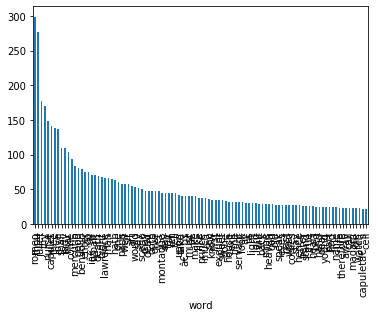

In [66]:
axes = df.plot.bar(x='word',   y='count', legend=False)

In [67]:
import matplotlib.pyplot as plt

In [68]:
%matplotlib inline

plt.gcf().tight_layout()

<Figure size 432x288 with 0 Axes>

In [69]:
import imageio

In [70]:
mask_image = imageio.imread('mask_heart.png')

In [73]:
from wordcloud import WordCloud

In [74]:
wordcloud = WordCloud(colormap='prism', mask=mask_image, background_color='white')

In [75]:
from pathlib import Path

In [76]:
text = Path('romeojuliet.txt').read_text()

In [77]:
wordcloud = wordcloud.generate(text)

In [78]:
wordcloud = wordcloud.to_file('RomeoAndJulietHeart.png')

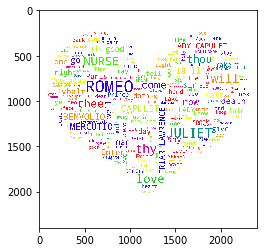

In [79]:
plt.imshow(wordcloud)

#### Readability

In [80]:
type(text)

str

In [81]:
len(text)

144382

In [82]:
text[:180]

'ï»¿THE TRAGEDY OF ROMEO AND JULIET\n\n\n\nby William Shakespeare\n\n\n\n\n\n\nContents\n\nTHE PROLOGUE.\n\nACT I\nScene I. A public place.\nScene II. A Street.\nScene III. Room in Capuletâ€™s House.'

In [85]:
from textatistic import Textatistic

In [86]:
readability = Textatistic(text)

In [87]:
type(readability)

textatistic.textatistic.Textatistic

In [88]:
readability.dict()

{'char_count': 117071,
 'word_count': 26080,
 'sent_count': 3218,
 'sybl_count': 30179,
 'notdalechall_count': 5864,
 'polysyblword_count': 571,
 'flesch_score': 100.71241837040115,
 'fleschkincaid_score': 1.2253298403916641,
 'gunningfog_score': 4.117531942638609,
 'smog_score': 5.535511919237148,
 'dalechall_score': 7.588807089721543}

notdalechall_count—A count of the words that are not on the Dale-Chall list, which is a list of words understood by 80% of 5th graders.27 The higher this number is compared to the total word count, the less readable the text is considered to be.

polysyblword_count—The number of words with three or more syllables.

flesch_score—The Flesch Reading Ease score, which can be mapped to a grade level. Scores over 90 are considered readable by 5th graders. Scores under 30 require a college degree. Ranges in between correspond to the other grade levels.

fleschkincaid_score—The Flesch-Kincaid score, which corresponds to a specific grade level.

gunningfog_score—The Gunning Fog index value, which corresponds to a specific grade level.

smog_score—The Simple Measure of Gobbledygook (SMOG), which corresponds to the years of education required to understand text. This measure is considered particularly effective for healthcare materials.

dalechall_score—The Dale-Chall score, which can be mapped to grade levels from 4 and below to college graduate (grade 16) and above. This score considered to be most reliable for a broad range of text types.

#### Named Entity Recognition with spaCy

NLP can determine what a text is about. A key aspect of this is named entity recognition, which attempts to locate and categorize items like dates, times, quantities, places, people, things, organizations and more.

In [90]:
import spacy

In [91]:
nlp = spacy.load('en')

In [92]:
document = nlp("""Mohandas Karamchand Gandhi was an Indian lawyer, anti-colonial nationalist,
and political ethicist, who employed nonviolent resistance to lead the successful campaign for India's independence 
from British Rule, and in turn inspire movements for civil rights and freedom across the world. 
The honorific Mahātmā (Sanskrit: "great-souled", "venerable"), first applied to him in 1914 in South Africa, 
is now used throughout the world.
Born and raised in a Hindu family in coastal Gujarat, western India, Gandhi was trained in law 
at the Inner Temple, London, and called to the bar at age 22 in June 1891. 
After two uncertain years in India, where he was unable to start a successful law practice, 
he moved to South Africa in 1893 to represent an Indian merchant in a lawsuit. He went on to stay for 21 years. 
It was in South Africa that Gandhi raised a family, and first employed nonviolent resistance in a campaign for civil rights. 
In 1915, aged 45, he returned to India. He set about organising peasants, farmers, and urban labourers to 
protest against excessive land-tax and discrimination. Assuming leadership of the Indian National Congress in 1921, 
Gandhi led nationwide campaigns for easing poverty, expanding women's rights, building religious and ethnic amity, 
ending untouchability, and above all for achieving Swaraj or self-rule.""")

In [93]:
for entity in document.ents:
    print(f'{entity.text}: {entity.label_}')

Mohandas Karamchand Gandhi: PERSON
Indian: NORP
India: GPE
British: NORP
Sanskrit: PERSON
first: ORDINAL
1914: DATE
South Africa: GPE
Hindu: NORP
Gujarat: GPE
India: GPE
Gandhi: PERSON
the Inner Temple: FAC
London: GPE
age 22: DATE
June 1891: DATE
two uncertain years: DATE
India: GPE
South Africa: GPE
1893: DATE
Indian: NORP
21 years: DATE
South Africa: GPE
Gandhi: PERSON
first: ORDINAL
1915: DATE
aged 45: DATE
India: GPE
the Indian National Congress: ORG
1921: DATE
Gandhi: PERSON


#### Similarity Detection with spaCy

Similarity detection is the process of analyzing documents to determine how alike they are. One possible similarity detection technique is word frequency counting.

In [94]:
document1 = nlp(Path('romeojuliet.txt').read_text())

document2 = nlp(Path('EdwardTheSecond.txt').read_text())

In [97]:
document1.similarity(document2)

C:\ProgramData\Anaconda3\lib\runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)


0.9367037666724977

#### Other NLP Libraries and Tools



    Gensim—Similarity detection and topic modeling.

    Google Cloud Natural Language API—Cloud-based API for NLP tasks such as named entity recognition, sentiment analysis, parts-of-speech analysis and visualization, determining content categories and more.

    Microsoft Linguistic Analysis API.

    Bing sentiment analysis—Microsoft’s Bing search engine now uses sentiment in its search results. At the time of this writing, sentiment analysis in search results is available only in the United States.

    PyTorch NLP—Deep learning library for NLP.

    Stanford CoreNLP—A Java NLP library, which also provides a Python wrapper. Includes corefererence resolution, which finds all references to the same thing.

    Apache OpenNLP—Another Java-based NLP library for common tasks, including coreference resolution. Python wrappers are available.

    PyNLPl (pineapple)—Python NLP library, includes basic and more sophisticated NLP capabilities.

    SnowNLP—Python library that simplifies Chinese text processing.

    KoNLPy—Korean language NLP.

    stop-words—Python library with stop words for many languages. We used NLTK’s stop words lists in this chapter.

    TextRazor—A paid cloud-based NLP API that provides a free tier.


#### Natural Language Datasets



    Wikipedia—some or all of Wikipedia (https://meta.wikimedia.org/wiki/Datasets).

    IMDB (Internet Movie Database)—various movie and TV datasets are available.

    UCIs text datasets—many datasets, including the Spambase dataset.

    Project Gutenberg—50,000+ free e-books that are out-of-copyright in the U.S.

    Jeopardy! dataset—200,000+ questions from the Jeopardy! TV show. A milestone in AI occurred in 2011 when IBM Watson famously beat two of the world’s best Jeopardy! players.

    Natural language processing datasets: https://machinelearningmastery.com/datasets-natural-language-processing/.

    NLTK data: https://www.nltk.org/data.html.

    Sentiment labeled sentences data set (from sources including IMDB.com, amazon.com, yelp.com.)

    Registry of Open Data on AWS—a searchable directory of datasets hosted on Amazon Web Services (https://registry.opendata.aws).

    Amazon Customer Reviews Dataset—130+ million product reviews (https://registry.opendata.aws/amazon-reviews/).

    Pitt.edu corpora (http://mpqa.cs.pitt.edu/corpora/).
